In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Data Preprocessing:

### Load the dataset into a suitable data structure (e.g., pandas DataFrame).
### Handle missing values, if any.
### Explore the dataset to understand its structure and attributes.

In [106]:
df = pd.read_csv(r"C:\Users\chand\OneDrive\Desktop\Recommendation System\Recommendation System\anime.csv")

In [107]:
df.head(10)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351
6,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855
7,820,Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space",OVA,110,9.11,80679
8,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,1,9.10,72534
9,15417,Gintama&#039;: Enchousen,"Action, Comedy, Historical, Parody, Samurai, S...",TV,13,9.11,81109


In [108]:
df.shape

(12294, 7)

In [109]:
df.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [110]:
df.nunique()

anime_id    12294
name        12292
genre        3264
type            6
episodes      187
rating        598
members      6706
dtype: int64

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [112]:
df.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [113]:
# Handle missing values
df['rating'] = df['rating'].fillna(df['rating'].mean())
df['genre'] = df['genre'].fillna(df['genre'].mode()[0])
df['type'] = df['type'].fillna(df['type'].mode()[0])

In [114]:
df.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [115]:
numeric_columns = df.select_dtypes(include=['number'])
# Generating a correlation matrix for numerical data
correlation_matrix = numeric_columns.corr()
correlation_matrix

,anime_id,rating,members
anime_id,1.000000,-0.277152,-0.080071
rating,-0.277152,1.000000,0.387523
members,-0.080071,0.387523,1.000000


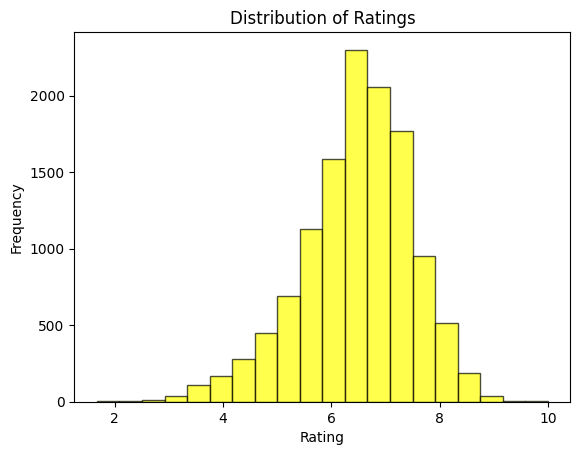

In [116]:
# Creating a histogram
plt.hist(df['rating'], bins=20, color='yellow', edgecolor='black', alpha=0.7)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


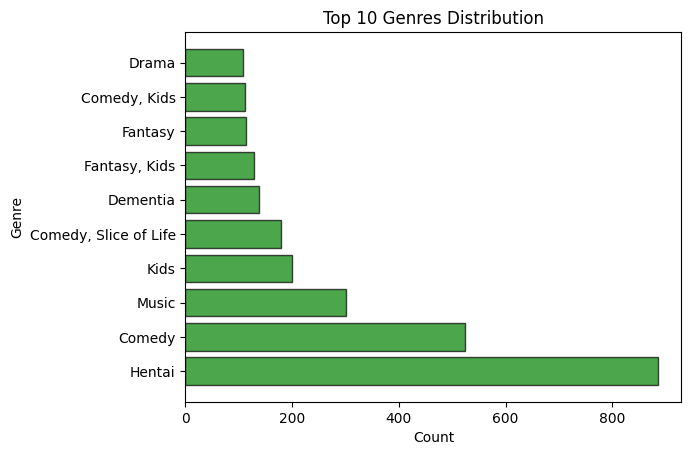

In [117]:
# Counting top 10 genres
top_genres = df['genre'].value_counts().index[:10]
genre_counts = df['genre'].value_counts().head(10)

# Creating a bar chart
plt.barh(top_genres, genre_counts, color='green', edgecolor='black', alpha=0.7)
plt.title('Top 10 Genres Distribution')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


# Feature Extraction:

### Decide on the features that will be used for computing similarity (e.g., genres, user ratings).
### Convert categorical features into numerical representations if necessary.
### Normalize numerical features if required.

In [118]:
genres = df['genre'].str.get_dummies(sep=', ')
df_numerical = pd.concat([df.drop('genre', axis=1), genres], axis=1)

In [119]:
# Normalizing the Data with StandardScaler
scalar = StandardScaler()
numerical_cols = ['rating','members']
df_numerical[numerical_cols] = scaler.fit_transform(df_numerical[numerical_cols])

df_numerical.head(10)

,anime_id,name,type,episodes,rating,members,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,Hentai,Historical,Horror,Josei,Kids,Magic,Martial Arts,Mecha,Military,Music,Mystery,Parody,Police,Psychological,Romance,Samurai,School,Sci-Fi,Seinen,Shoujo,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,32281,Kimi no Na wa.,Movie,1,2.847535,3.330241,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,5114,Fullmetal Alchemist: Brotherhood,TV,64,2.739380,14.148406,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,28977,Gintama°,TV,51,2.729547,1.754713,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,9253,Steins;Gate,TV,24,2.650889,11.957666,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,9969,Gintama&#039;,TV,51,2.641057,2.429742,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,TV,10,2.631224,1.373254,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
6,11061,Hunter x Hunter (2011),TV,148,2.611560,7.438804,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
7,820,Ginga Eiyuu Densetsu,OVA,110,2.591895,1.142091,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,Movie,1,2.582063,0.993510,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9,15417,Gintama&#039;: Enchousen,TV,13,2.591895,1.149935,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0


# Recommendation System:

### Design a function to recommend anime based on cosine similarity.
### Given a target anime, recommend a list of similar anime based on cosine similarity scores.
### Experiment with different threshold values for similarity scores to adjust the recommendation list size.

In [120]:
from sklearn.metrics.pairwise import cosine_similarity

def recommend_similar_anime(target_anime, threshold=0.5):
    # Find the row corresponding to the target anime
    target_row = df_numerical[df_numerical['name'] == target_anime].drop(['name', 'type'], axis=1)

    # Replace 'Unknown' values in 'episodes' column with NaN
    df_numerical['episodes'] = pd.to_numeric(df_numerical['episodes'], errors='coerce')

    # Drop rows with NaN values in 'episodes' column
    df_numerical.dropna(subset=['episodes'], inplace=True)

    # Compute cosine similarity between target anime and all other anime
    similarities = cosine_similarity(target_row, df_numerical.drop(['name', 'type'], axis=1))

    # Get indices of anime with similarity above threshold
    similar_anime_indices = np.where(similarities > threshold)[1]

    # Exclude the target anime itself from recommendations
    similar_anime_indices = similar_anime_indices[similar_anime_indices != target_row.index[0]]

    # Get names of recommended anime
    recommended_anime = df_numerical.iloc[similar_anime_indices]['name'].tolist()

    return recommended_anime

In [121]:
threshold_values = [0.2, 0.5, 0.9]
target_anime = 'Nana'

for threshold in threshold_values:
    # Get recommendations for the current threshold
    recommended_anime = recommend_similar_anime(target_anime, threshold=threshold)

    # Create a DataFrame to display the recommended anime
    df_recommendations = pd.DataFrame(recommended_anime, columns=['Recommended Anime'])

    # Add additional information
    num_recommendations = len(recommended_anime)
    value_counts = df_recommendations['Recommended Anime'].value_counts()
    top_5_recommendations = value_counts.head(5)

    # Create pie chart of the top 5 recommendations
    fig = px.pie(names=top_5_recommendations.index, values=top_5_recommendations.values,
                 title=f'Top 5 recommendations for threshold {threshold}',
                 labels={'names': 'Anime', 'values': 'Count'})
    fig.update_traces(textposition='inside', textinfo='percent+label')
    fig.show()

    # Display the information for the current threshold
    print(f"\nRecommendations for threshold {threshold}:")
    print("Recommended anime similar to '{}':".format(target_anime))
    print(df_recommendations)
    print("\nNumber of recommendations:", num_recommendations)
    print("\nValue counts of recommended anime:")
    print(value_counts)
    print("\nTop 5 recommendations:")
    print(top_5_recommendations)



Recommendations for threshold 0.2:
Recommended anime similar to 'Nana':
                                       Recommended Anime
0                                         Kimi no Na wa.
1                       Fullmetal Alchemist: Brotherhood
2                                               Gintama°
3                                            Steins;Gate
4                                          Gintama&#039;
...                                                  ...
11944       Toushindai My Lover: Minami tai Mecha-Minami
11945                                        Under World
11946                     Violence Gekiga David no Hoshi
11947  Violence Gekiga Shin David no Hoshi: Inma Dens...
11948                   Yasuji no Pornorama: Yacchimae!!

[11949 rows x 1 columns]

Number of recommendations: 11949

Value counts of recommended anime:
Saru Kani Gassen                                                                                   2
Shi Wan Ge Leng Xiaohua                       


Recommendations for threshold 0.5:
Recommended anime similar to 'Nana':
                                       Recommended Anime
0                                         Kimi no Na wa.
1                       Fullmetal Alchemist: Brotherhood
2                                               Gintama°
3                                            Steins;Gate
4                                          Gintama&#039;
...                                                  ...
11937       Toushindai My Lover: Minami tai Mecha-Minami
11938                                        Under World
11939                     Violence Gekiga David no Hoshi
11940  Violence Gekiga Shin David no Hoshi: Inma Dens...
11941                   Yasuji no Pornorama: Yacchimae!!

[11942 rows x 1 columns]

Number of recommendations: 11942

Value counts of recommended anime:
Shi Wan Ge Leng Xiaohua             2
Saru Kani Gassen                    2
Kimi no Na wa.                      1
C.L.A.Y.                         


Recommendations for threshold 0.9:
Recommended anime similar to 'Nana':
                                       Recommended Anime
0                                         Kimi no Na wa.
1                       Fullmetal Alchemist: Brotherhood
2                                               Gintama°
3                                            Steins;Gate
4                                          Gintama&#039;
...                                                  ...
11914       Toushindai My Lover: Minami tai Mecha-Minami
11915                                        Under World
11916                     Violence Gekiga David no Hoshi
11917  Violence Gekiga Shin David no Hoshi: Inma Dens...
11918                   Yasuji no Pornorama: Yacchimae!!

[11919 rows x 1 columns]

Number of recommendations: 11919

Value counts of recommended anime:
Saru Kani Gassen                       2
Shi Wan Ge Leng Xiaohua                2
Kimi no Na wa.                         1
Born by Myself          

In [122]:
threshold_values = [0.2, 0.5, 0.9]
target_anime = 'Kimi no Na wa.'

for threshold in threshold_values:
    # Get recommendations for the current threshold
    recommended_anime = recommend_similar_anime(target_anime, threshold=threshold)

    # Create a DataFrame to display the recommended anime
    df_recommendations = pd.DataFrame(recommended_anime, columns=['Recommended Anime'])

    # Add additional information
    num_recommendations = len(recommended_anime)
    value_counts = df_recommendations['Recommended Anime'].value_counts()
    top_5_recommendations = value_counts.head(5)

    # Create pie chart of the top 5 recommendations
    fig = px.pie(names=top_5_recommendations.index, values=top_5_recommendations.values,
                 title=f'Top 5 recommendations for threshold {threshold}',
                 labels={'names': 'Anime', 'values': 'Count'})
    fig.update_traces(textposition='inside', textinfo='percent+label')
    fig.show()

    # Display the information for the current threshold
    print(f"\nRecommendations for threshold {threshold}:")
    print("Recommended anime similar to '{}':".format(target_anime))
    print(df_recommendations)
    print("\nNumber of recommendations:", num_recommendations)
    print("\nValue counts of recommended anime:")
    print(value_counts)
    print("\nTop 5 recommendations:")
    print(top_5_recommendations)


Recommendations for threshold 0.2:
Recommended anime similar to 'Kimi no Na wa.':
                                       Recommended Anime
0                       Fullmetal Alchemist: Brotherhood
1                                               Gintama°
2                                            Steins;Gate
3                                          Gintama&#039;
4      Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...
...                                                  ...
11943       Toushindai My Lover: Minami tai Mecha-Minami
11944                                        Under World
11945                     Violence Gekiga David no Hoshi
11946  Violence Gekiga Shin David no Hoshi: Inma Dens...
11947                   Yasuji no Pornorama: Yacchimae!!

[11948 rows x 1 columns]

Number of recommendations: 11948

Value counts of recommended anime:
Saru Kani Gassen                             2
Shi Wan Ge Leng Xiaohua                      2
Byston Well Monogatari: Garzey no Tsubasa  


Recommendations for threshold 0.5:
Recommended anime similar to 'Kimi no Na wa.':
                                       Recommended Anime
0                       Fullmetal Alchemist: Brotherhood
1                                               Gintama°
2                                            Steins;Gate
3                                          Gintama&#039;
4      Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...
...                                                  ...
11937       Toushindai My Lover: Minami tai Mecha-Minami
11938                                        Under World
11939                     Violence Gekiga David no Hoshi
11940  Violence Gekiga Shin David no Hoshi: Inma Dens...
11941                   Yasuji no Pornorama: Yacchimae!!

[11942 rows x 1 columns]

Number of recommendations: 11942

Value counts of recommended anime:
Shi Wan Ge Leng Xiaohua             2
Saru Kani Gassen                    2
Fullmetal Alchemist: Brotherhood    1
C.L.A.Y.               


Recommendations for threshold 0.9:
Recommended anime similar to 'Kimi no Na wa.':
                                       Recommended Anime
0                       Fullmetal Alchemist: Brotherhood
1                                               Gintama°
2                                            Steins;Gate
3                                          Gintama&#039;
4      Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...
...                                                  ...
11903       Toushindai My Lover: Minami tai Mecha-Minami
11904                                        Under World
11905                     Violence Gekiga David no Hoshi
11906  Violence Gekiga Shin David no Hoshi: Inma Dens...
11907                   Yasuji no Pornorama: Yacchimae!!

[11908 rows x 1 columns]

Number of recommendations: 11908

Value counts of recommended anime:
Shi Wan Ge Leng Xiaohua                                    2
Saru Kani Gassen                                           2
CCW: Crazy Clay

# Evaluation:

### Split the dataset into training and testing sets.
### Evaluate the recommendation system using appropriate metrics such as precision, recall, and F1-score.
### Analyze the performance of the recommendation system and identify areas of improvement.

In [123]:
pd.set_option('display.max_columns', None)
df_numerical.describe()

,anime_id,episodes,rating,members,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,Hentai,Historical,Horror,Josei,Kids,Magic,Martial Arts,Mecha,Military,Music,Mystery,Parody,Police,Psychological,Romance,Samurai,School,Sci-Fi,Seinen,Shoujo,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
count,11954.000000,11954.000000,11954.000000,11954.000000,11954.000000,11954.000000,11954.000000,11954.000000,11954.000000,11954.000000,11954.000000,11954.000000,11954.000000,11954.000000,11954.000000,11954.000000,11954.00000,11954.000000,11954.000000,11954.000000,11954.000000,11954.000000,11954.000000,11954.000000,11954.000000,11954.000000,11954.000000,11954.000000,11954.000000,11954.000000,11954.00000,11954.000000,11954.000000,11954.000000,11954.000000,11954.000000,11954.000000,11954.000000,11954.000000,11954.000000,11954.000000,11954.000000,11954.000000,11954.000000,11954.000000,11954.000000,11954.000000
mean,13589.705120,12.382550,0.006283,0.005422,0.232558,0.193073,0.005939,0.377112,0.019910,0.024260,0.166053,0.052618,0.188222,0.014556,0.026184,0.096369,0.06617,0.030366,0.004350,0.130417,0.063577,0.021583,0.077882,0.034884,0.069935,0.040656,0.033294,0.016313,0.018989,0.120796,0.01213,0.098293,0.170320,0.044504,0.049356,0.004517,0.140455,0.005354,0.099130,0.031454,0.044420,0.037393,0.084240,0.007194,0.008449,0.003095,0.003430
std,11209.052798,46.865352,1.001573,1.005333,0.422481,0.394727,0.076842,0.484684,0.139696,0.153861,0.372144,0.223280,0.390905,0.119771,0.159688,0.295110,0.24859,0.171601,0.065814,0.336775,0.244008,0.145323,0.267997,0.183493,0.255048,0.197500,0.179411,0.126680,0.136493,0.325904,0.10947,0.297723,0.375929,0.206220,0.216619,0.067062,0.347473,0.072977,0.298849,0.174548,0.206036,0.189732,0.277758,0.084517,0.091533,0.055551,0.058467
min,1.000000,1.000000,-4.723348,-0.329567,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3380.250000,1.000000,-0.574111,-0.325481,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9934.500000,2.000000,0.084655,-0.300845,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,23644.500000,12.000000,0.694258,-0.151698,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,34527.000000,1818.000000,3.466971,18.166251,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [124]:
# Calculate mean and standard deviation for episodes, rating, and members
mean_episodes = 12.382550
mean_rating = 0.577466
mean_members = 0.018112

std_dev_episodes = np.std(df_numerical['episodes'])
std_dev_rating = np.std(df_numerical['rating'])
std_dev_members = np.std(df_numerical['members'])

# Set threshold values
episodes_threshold = mean_episodes + std_dev_episodes
rating_threshold = mean_rating + std_dev_rating
members_threshold = mean_members + std_dev_members

print("Threshold values:")
print("Episodes threshold:", episodes_threshold)
print("Rating threshold:", rating_threshold)
print("Members threshold:", members_threshold)

Threshold values:
Episodes threshold: 59.24594168616798
Rating threshold: 1.5789975284963749
Members threshold: 1.0234026161429104


In [125]:
# Create binary target variable based on thresholds
df_numerical['liked'] = ((df_numerical['rating'] >= rating_threshold) |
                         (df_numerical['episodes'] >= episodes_threshold) |
                         (df_numerical['members'] >= members_threshold)).astype(int)

# Display the updated dataset with the new 'liked' column
df_numerical.head()

,anime_id,name,type,episodes,rating,members,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,Hentai,Historical,Horror,Josei,Kids,Magic,Martial Arts,Mecha,Military,Music,Mystery,Parody,Police,Psychological,Romance,Samurai,School,Sci-Fi,Seinen,Shoujo,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri,liked
0,32281,Kimi no Na wa.,Movie,1.0,2.847535,3.330241,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,5114,Fullmetal Alchemist: Brotherhood,TV,64.0,2.739380,14.148406,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,28977,Gintama°,TV,51.0,2.729547,1.754713,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,9253,Steins;Gate,TV,24.0,2.650889,11.957666,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,9969,Gintama&#039;,TV,51.0,2.641057,2.429742,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


0    10664
1     1290
Name: liked, dtype: int64


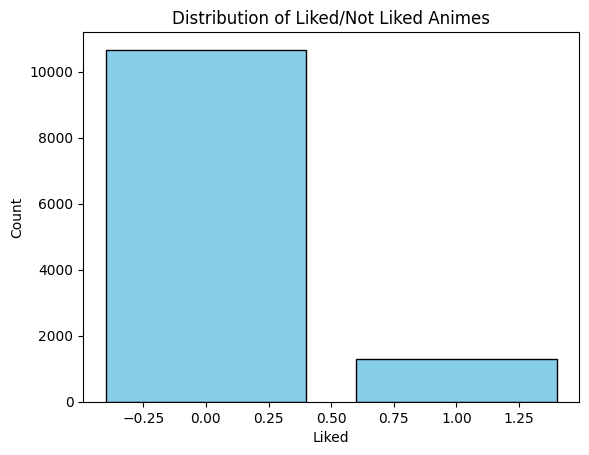

In [126]:
# Calculate value counts for the 'liked' column
liked_counts = df_numerical['liked'].value_counts()

# Plot bar plot
fig, ax = plt.subplots()
ax.bar(liked_counts.index, liked_counts.values, color='skyblue', edgecolor='black')

# Set titles and labels
ax.set_title('Distribution of Liked/Not Liked Animes')
ax.set_xlabel('Liked')
ax.set_ylabel('Count')

print(df_numerical['liked'].value_counts())

# Display the plot
plt.show()


In [127]:
from sklearn.model_selection import train_test_split

X = df_numerical.drop(['name', 'type','anime_id'], axis=1)  # Features
y = df_numerical['liked']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (9563, 47)
Shape of X_test: (2391, 47)
Shape of y_train: (9563,)
Shape of y_test: (2391,)


In [128]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a binary classification model (logistic regression) using the scaled training set
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the scaled testing set
y_pred = model.predict(X_test_scaled)

# Calculate precision, recall, and F1-score, accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Accuracy:", accuracy)

Precision: 1.0
Recall: 1.0
F1-score: 1.0
Accuracy: 1.0


# Interview Questions:
### 1. Can you explain the difference between user-based and item-based collaborative filtering?

In [129]:
""" User-Based Collaborative Filtering
       User-based collaborative filtering makes recommendations based on the similarity between users. It assumes that if two users have similar tastes in the past, 
       they will like similar items in the future.

Item-Based Collaborative Filtering
       Item-based collaborative filtering, on the other hand, focuses on the similarity between items. It assumes that if a user likes a particular item, 
       they are likely to like other items that are similar to it."""

' User-Based Collaborative Filtering\n       User-based collaborative filtering makes recommendations based on the similarity between users. It assumes that if two users have similar tastes in the past, \n       they will like similar items in the future.\n\nItem-Based Collaborative Filtering\n       Item-based collaborative filtering, on the other hand, focuses on the similarity between items. It assumes that if a user likes a particular item, \n       they are likely to like other items that are similar to it.'

### 2. What is collaborative filtering, and how does it work?

In [130]:
""" Collaborative filtering is a popular technique used in recommendation systems to predict and suggest items to users based on the preferences and 
    behaviors of other users. It leverages the collective experiences of users to make personalized recommendations. There are two main types of collaborative 
    filtering user-based and item-based.

Collaborative Filtering Works:
    1. Data Collection
    2. Similarity Calculation
    3. Neighborhood Selection
    4. Recommendation Generation """

' Collaborative filtering is a popular technique used in recommendation systems to predict and suggest items to users based on the preferences and \n    behaviors of other users. It leverages the collective experiences of users to make personalized recommendations. There are two main types of collaborative \n    filtering user-based and item-based.\n\nCollaborative Filtering Works:\n    1. Data Collection\n    2. Similarity Calculation\n    3. Neighborhood Selection\n    4. Recommendation Generation '